use python 3.9.13


In [17]:
pip install hf_xet

   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   -------------------------------

In [1]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Rancangan


---

[ Pilih Soal ]: ⬇️ Stimulus A / Stimulus B

[ Stimulus ]:
Pemanasan global terjadi karena...

[ Pertanyaan ]:
Apa yang menjadi tantangan...

[ Jawaban Siswa ]:
✎ **\*\*\*\***\_**\*\*\*\***--

[🔍 Nilai Jawaban]

📊 Hasil:
✅ Jawaban diklasifikasikan sebagai "Relevan dan Benar" (Label: 1)

🧠 Alasan: Jawaban mengandung kata kunci "pindah", "ekonomi", "sosial"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, f1_score
import numpy as np

c:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from sentence_transformers import SentenceTransformer # type: ignore


In [5]:
import optuna
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

---


# Data Understanding


In [6]:
train_a = pd.read_csv('../Dataset/Data_A/data_train_A.csv')
dev_a = pd.read_csv('../Dataset/Data_A/data_dev_A.csv')
test_a = pd.read_csv('../Dataset/Data_A/data_test_A.csv')
train_b = pd.read_csv('../Dataset/Data_B/data_train_B.csv')
dev_b = pd.read_csv('../Dataset/Data_B/data_dev_B.csv')
test_b = pd.read_csv('../Dataset/Data_B/data_test_B.csv')

In [7]:
print("Data Train A:")
print(train_a.head())
print("\nKolom:", train_a.columns.tolist())

Data Train A:
  RES_ID                                           RESPONSE  LABEL
0   TRA1  intetraksi/beradaptasi terhadap lingkungan yan...      1
1   TRA2         seperti jatuhnya meteor tsunami gempa bumi      0
2   TRA3      hanya tuhan yang tahu tantangan nya itu apaan      0
3   TRA4                      mereka akan sulit beradaptasi      1
4   TRA5             Tempat tinggal, ekonomi, dan pekerjaan      1

Kolom: ['RES_ID', 'RESPONSE', 'LABEL']


In [8]:
print("Data Train B:")
print(train_b.head())
print("\nKolom:", train_b.columns.tolist())

Data Train B:
  RES_ID                                           RESPONSE  LABEL
0   TRB1  Karena orang berpikir bahwa jika disumbangkan ...      1
1   TRB2  Pakaian awet adalah alternatif terhadap Fast F...      0
2   TRB3                  karna orang lebih suka menyumbang      1
3   TRB4               karana harga nya terjangkau dan pas.      0
4   TRB5                            kerena harganya mahal .      0

Kolom: ['RES_ID', 'RESPONSE', 'LABEL']


In [9]:
stimulus_a = ["Pemanasan global terjadi karena peningkatan produksi karbon dioksida yang dihasilkan oleh pembakaran fosil dan konsumsi bahan bakar yang tinggi.",
"Salah satu akibat adalah mencairnya es abadi di kutub utara dan selatan yang menimbulkan naiknya ketinggian air laut.",
"kenaikan air laut akan terjadi terus menerus meskipun dalam hitungan centimeter akan mengakibatkan perubahan yang signifikan.",
"Film “Waterworld”, adalah film fiksi ilmiah yang menunjukkan akibat adanya pemanasan global yang sangat besar sehingga menyebabkan bumi menjadi tertutup oleh lautan.",
"Negara-negara dan daratan yang dulunya kering menjadi tengelamn karena terjadi kenaikan permukaan air laut.",
"Penduduk yang dulunya bisa berkehidupan bebas menjadi terpaksa mengungsi ke daratan yang lebih tinggi atau tinggal diatas air.",
"Apa yang akan menjadi tantangan bagi suatu penduduk ketika terjadi situasi daratan tidak dapat ditinggali kembali karena tengelam oleh naiknya air laut."]

stimulus_b = ["Sebuah toko baju berkonsep self-service menawarkan promosi dua buah baju bertema tahun baru seharga Rp50.000,00. sebelum baju bertema tahun baru dibagikan kepada pembeli, sebuah layar akan menampilkan tampilan gambar yang menampilkan kondisi kerja di dalam sebuah pabrik konveksi/pembuatan baju. ",
"Kemudian pembeli diberi program pilihan untuk menyelesaikan pembeliannya atau menyumpangkan Rp50.000,00 untuk dijadikan donasi pembagian baju musim dingin di suatu daerah yang membutuhkan.",
"Delapan dari sepuluh pembeli memilih untuk memberikan donasi.",
"Menurut anda mengapa banyak dari pembeli yang memilih berdonasi?"]

In [10]:
stimulus_a_text = " ".join(stimulus_a)
stimulus_b_text = " ".join(stimulus_b)

for df in [train_a, dev_a, test_a]:
    df["TEXT"] = stimulus_a_text + " [SEP] " + df["RESPONSE"]

for df in [train_b, dev_b, test_b]:
    df["TEXT"] = stimulus_b_text + " [SEP] " + df["RESPONSE"]


In [11]:
print(train_a.info())
print(train_a.describe(include='all'))  
print(train_b.info())
print(train_b.describe(include='all'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RES_ID    268 non-null    object
 1   RESPONSE  268 non-null    object
 2   LABEL     268 non-null    int64 
 3   TEXT      268 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.5+ KB
None
        RES_ID                                           RESPONSE       LABEL  \
count      268                                                268  268.000000   
unique     268                                                265         NaN   
top     TRA268  Pengungsi iklim adalah orang-orang yang terpak...         NaN   
freq         1                                                  3         NaN   
mean       NaN                                                NaN    0.712687   
std        NaN                                                NaN    0.453356   
min        NaN                                

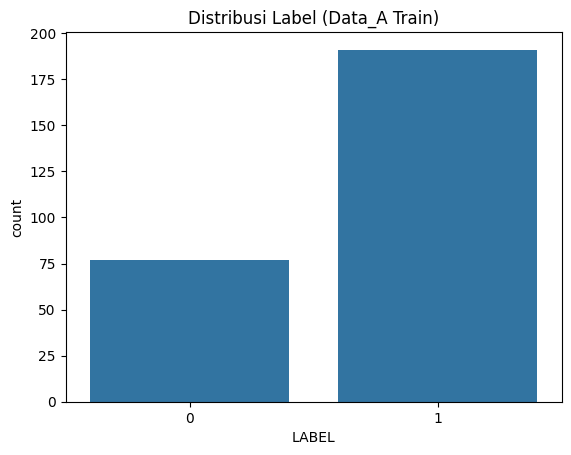

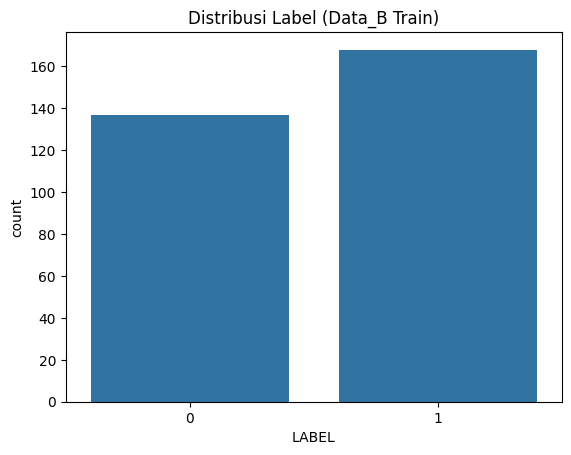

In [12]:
sns.countplot(x='LABEL', data=train_a)
plt.title('Distribusi Label (Data_A Train)')
plt.show()

sns.countplot(x='LABEL', data=train_b)
plt.title('Distribusi Label (Data_B Train)')
plt.show()

---


# Preprocess


In [13]:
stopwords_ukara = {'yang', 'lebih', 'untuk', 'akan', 'mereka', 'dan'}

In [14]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords_ukara]
    return " ".join(tokens)

In [ ]:
train_a["clean_response"] = train_a["RESPONSE"].apply(preprocess)
train_b["clean_response"] = train_b["RESPONSE"].apply(preprocess)
test_a["clean_response"] = test_a["RESPONSE"].apply(preprocess)
test_b["clean_response"] = test_b["RESPONSE"].apply(preprocess)
dev_a["clean_response"] = dev_a["RESPONSE"].apply(preprocess)
dev_b["clean_response"] = dev_b["RESPONSE"].apply(preprocess)

In [16]:
sbert_model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Error while downloading from https://huggingface.co/sentence-transformers/paraphrase-xlm-r-multilingual-v1/resolve/main/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...


KeyboardInterrupt: 

In [ ]:
def extract_features(df, sbert_model):
    embeddings = sbert_model.encode(df['clean_response'].tolist())
    labels = df['LABEL'].values
    return embeddings, labels


In [ ]:
train_embeddings_a, train_labels_a = extract_features(train_a, sbert_model)
dev_embeddings_a, dev_labels_a = extract_features(dev_a, sbert_model)
test_embeddings_a, test_labels_a = extract_features(test_a, sbert_model)

train_embeddings_b, train_labels_b = extract_features(train_b, sbert_model)
dev_embeddings_b, dev_labels_b = extract_features(dev_b, sbert_model)
test_embedding_b, test_label_b = exteact_features(test_b, sbert_model)



In [ ]:
# def main():
    

    
#     # 3. Hyperparameter optimization with Optuna
#     study = optuna.create_study(direction='maximize')
#     study.optimize(lambda trial: objective(trial, train_embeddings, train_labels), n_trials=100)
    
#     # 4. Train final model with best params
#     best_params = study.best_params
#     print("Best hyperparameters:", best_params)
    
#     final_model = train_model_with_params(best_params, train_embeddings, train_labels)
    
#     # 5. Evaluate on dev and test sets
#     dev_f1 = evaluate_model(final_model, dev_embeddings, dev_labels)
#     test_f1 = evaluate_model(final_model, test_embeddings, test_labels)
    
#     print(f"Validation F1-score: {dev_f1:.3f}")
#     print(f"Test F1-score: {test_f1:.3f}")

# Opsi

1. Bert prepocessing + Model
2. Bert Prepocessing, Model Neural
3. Bert ...
